<a href="https://colab.research.google.com/github/conradoov/formacao_machine_learning_alura/blob/main/machine_learning_modelo_multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1 - Obtendo e tratamento inicial dos dados

In [1]:
#Obtendo dataset para desenvolvimento do modelo de classificacao
import pandas as pd

resultados_exames = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")
resultados_exames.head(5)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
valores_exames = resultados_exames.drop(columns=['id','diagnostico'], axis=1)
diagnostico = resultados_exames.diagnostico

#Removendo coluna com alto volume de valores vazios
valores_exames_v1 = valores_exames.drop(columns=['exame_33'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from numpy import random

seed = 123143
random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size=0.3)

In [4]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)


print('Resultado da classificacao %.2f%%' %(classificador.score(teste_x, teste_y) * 100))

Resultado da classificacao 92.40%


In [5]:
from sklearn.dummy import DummyClassifier

seed = 123143
random.seed(seed)

classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(treino_x, treino_y)

print('Resultado da classificacao Dummy %.2f%%' %(classificador_dummy.score(teste_x, teste_y) * 100))

Resultado da classificacao Dummy 66.67%


## Aula 2 - Avançando e explorando os dados

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

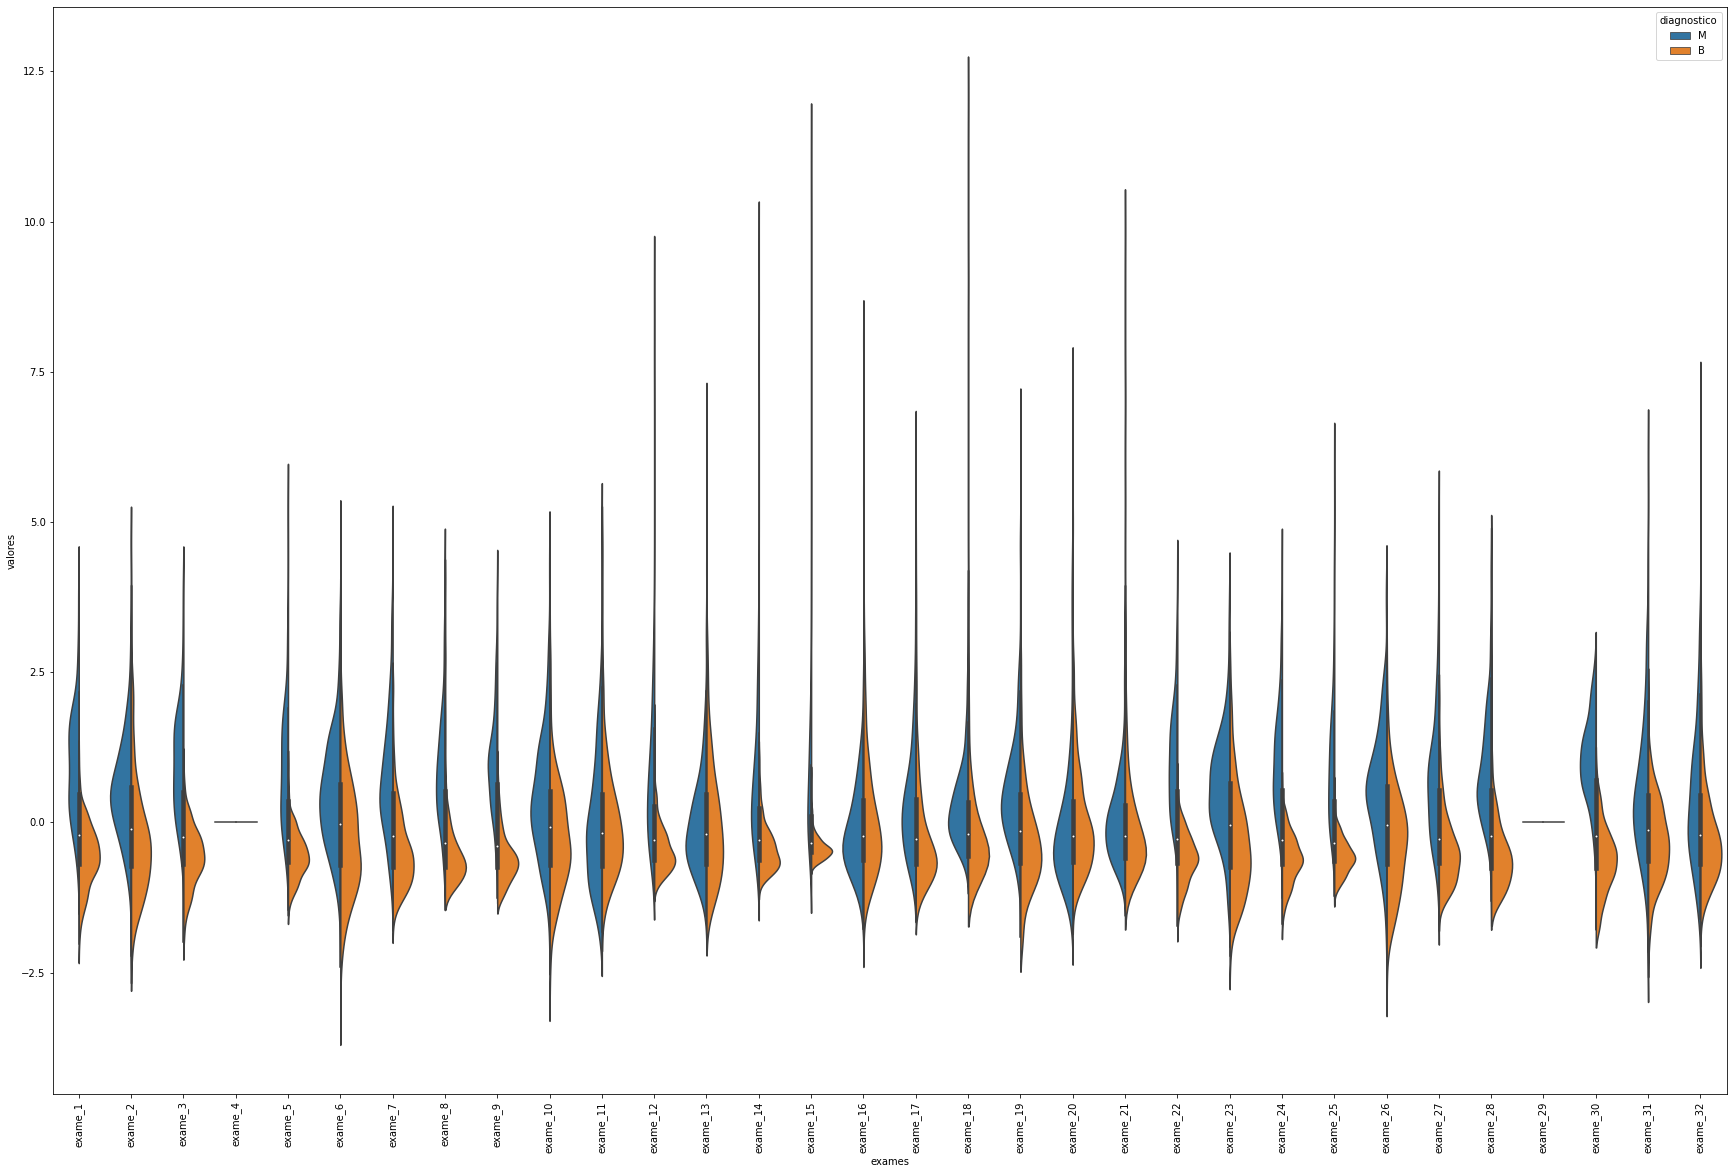

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, 
                                 columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2], axis=1)

dados_plot = pd.melt(dados_plot, 
                     id_vars="diagnostico",
                     var_name="exames",
                     value_name="valores")
plt.figure(figsize = (30,20))
sns.violinplot(x="exames",
               y="valores",
               hue="diagnostico",
               split = True,
               data=dados_plot)

plt.xticks(rotation=90)



* Exames com cristas de onda em diferentes posições no eixo Y são exames melhores para analisar os valores das classificações de câncer
* O exame 4 e exame 29 não agregam em nada na classificação, pois seus valores são constantes.

In [7]:
def grafico_violino(valores, inicio, fim):


  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio : fim]], axis=1)
  dados_plot = pd.melt(dados_plot, 
                      id_vars="diagnostico",
                      var_name="exames",
                      value_name="valores")
  plt.figure(figsize = (10,10))
  sns.violinplot(x="exames",
                y="valores",
                hue="diagnostico",
                split = True,
                data=dados_plot)
  plt.xticks(rotation=90)



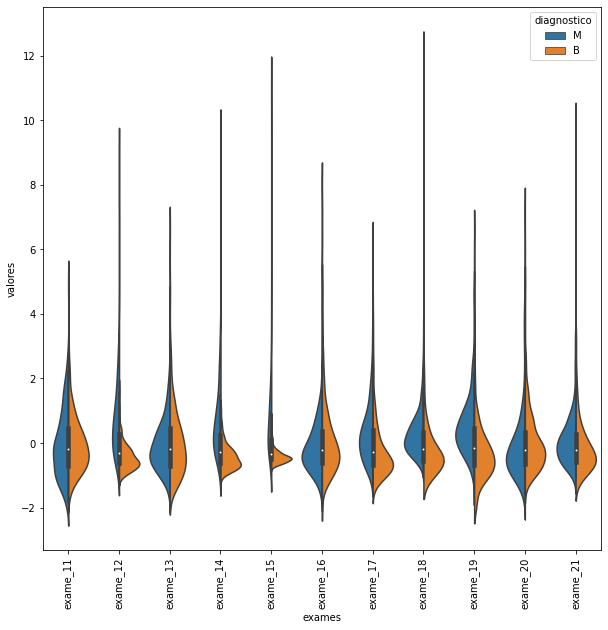

In [8]:
grafico_violino(valores_exames_v2, 10, 21)

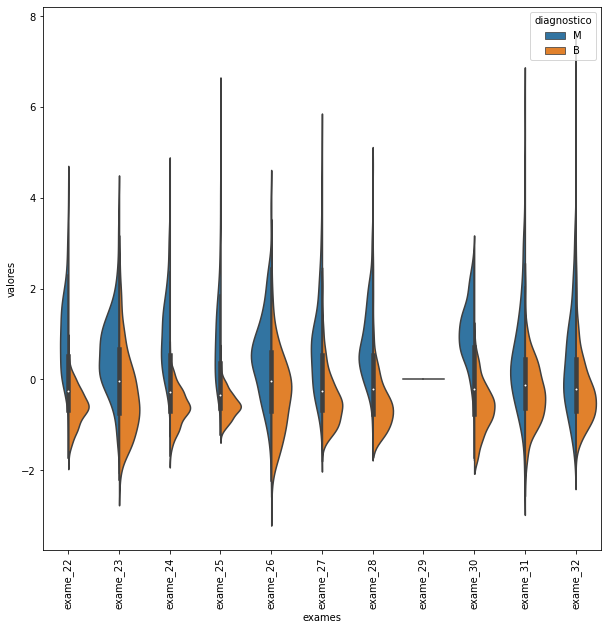

In [9]:
grafico_violino(valores_exames_v2, 21, 32)

In [10]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_4", "exame_29"], axis=1)

def classificar(valores):
  seed = 1234
  random.seed(seed)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                        diagnostico,
                                                        test_size=0.3)  
  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)
  print('Resultado da classificacao %.2f%%' %(classificador.score(teste_x, teste_y) * 100))

classificar(valores_exames_v3)

Resultado da classificacao 92.98%


## Aula 3 - Dados Correlacionados

*   O objetivo desta aula é encontrar correlação entre as variáveis, através de uma matriz de correlação.
*   Cada célula da matriz indica a correlação correspondente entre variável da linha e  variável da coluna.

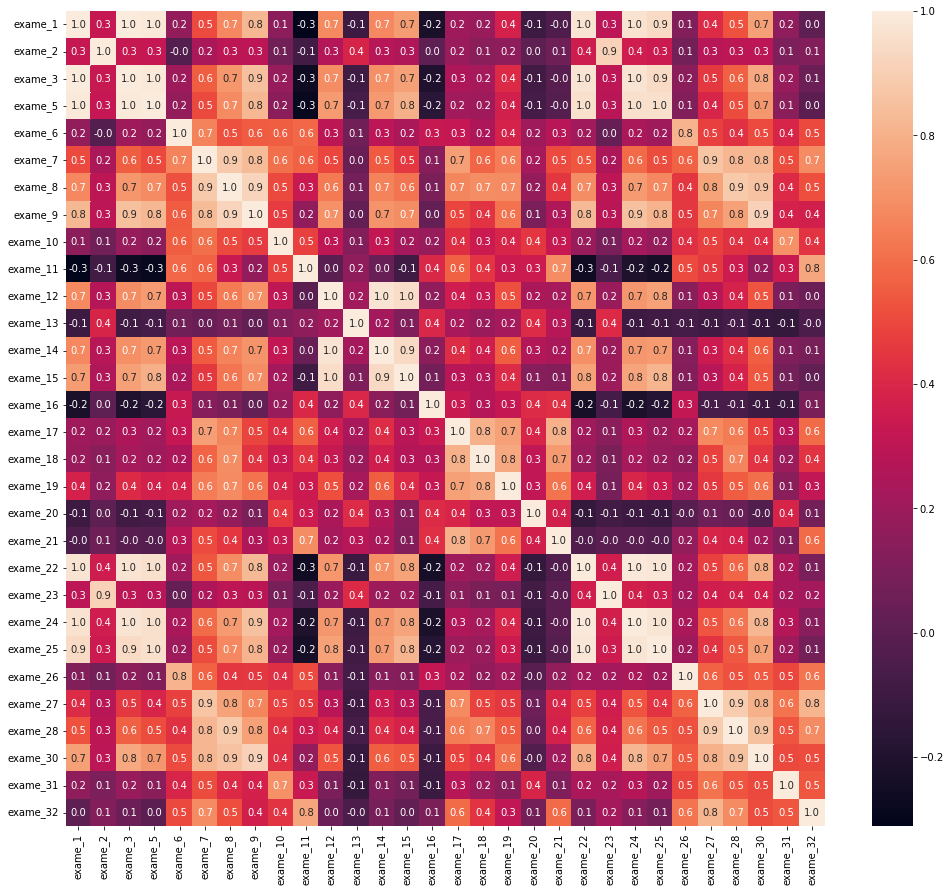

In [13]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))

sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [14]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variáveis que obtiverem valor maior do que 1 estão altamente correlacionadas com outras variáveis

In [16]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [19]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [22]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [24]:
classificar(valores_exames_v4)

Resultado da classificacao 91.81%


Não se pode excluír todas as variáveis correlacionadas, precisa escolher entre uma das duas para remover do df.

In [26]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [27]:
classificar(valores_exames_v5)

Resultado da classificacao 92.98%


## Aula 5 - Automatizando a seleção

*   Nesta aula será visto como selecionar as k melhores features para nosso modelo
*   SelectKBest gera um score para cada feature e através de um K definido, ela seleciona as variáveis com melhor score através de uma função
*   A função chi2 não aceita valores negativos

### Selecionando KBest Features

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f7283ae3290>)

In [39]:
SEED = 1234
random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3','exame_24'])



treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x7f7283ae3290>)

In [40]:
#Utilizando somente as melhores variaveis no modelo
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [41]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)

In [42]:
classificador.fit(treino_kbest, treino_y)
print('Resultado da classificacao com 5 melhores features %.2f%%' %(classificador.score(teste_kbest, teste_y) * 100))

Resultado da classificacao com 5 melhores features 92.40%


### Matriz de confusão

*   Melhorando o entendimento da acurácia do modelo através da Matriz de Confusão

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(66.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

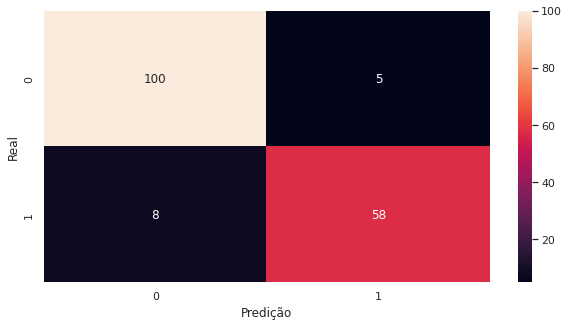

In [49]:
plt.figure(figsize=(10,5))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='Predição', ylabel='Real')

*   Eixo X representa os valores de Predição e Eixo Y os valores reais
*   De 105 casos o modelo acerta corretamente 100, pois de 105 casos o modelo classifica como cancer benigno (class=0) e o real indica que são benignos
*   Já para cancer maligno (class =1), de 66 casos o modelo indica 58 como cancer maligno

### Seleção com RFE

*   Define uma pontuação para cada feature e elimina a feature de menor pontuação.
*   Segue realizando uma eliminação recursiva até que o numero desejado seja atingido

In [50]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)

selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

In [51]:
classificador.fit(treino_rfe, treino_y)
print('Resultado da classificacao com 5 melhores features selecionadas via RFE %.2f%%' %(classificador.score(teste_rfe, teste_y) * 100))

Resultado da classificacao com 5 melhores features selecionadas via RFE 90.06%


[Text(66.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

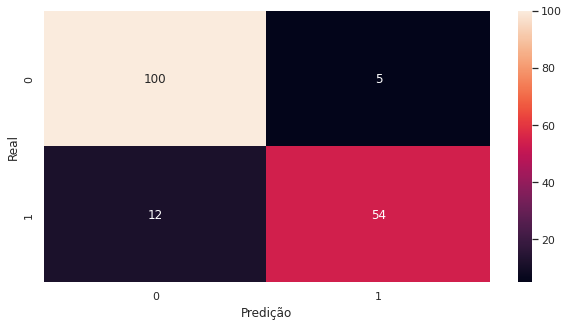

In [52]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao

plt.figure(figsize=(10,5))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='Predição', ylabel='Real')

O Select KBest, para esta base de dados, aparenta ser uma melhor opção, pois além de ter uma acertividade maior, a seleção via RFE erra mais no diagnóstico de câncer benigno.

## Aula 5 - Visualizando os dados no plano

*   Seleção via algoritmo RFECV - RFE aplicado em blocos
*   Seleciona as melhores features utilizando o RFE com validação cruzada

### RFECV

In [73]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring='accuracy', step = 1)

selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)


classificador.fit(treino_rfecv, treino_y)
print('Resultado da classificacao com 5 melhores features selecionadas via RFECV %.2f%%' %(classificador.score(teste_rfecv, teste_y) * 100))

Resultado da classificacao com 5 melhores features selecionadas via RFECV 92.98%


[Text(66.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

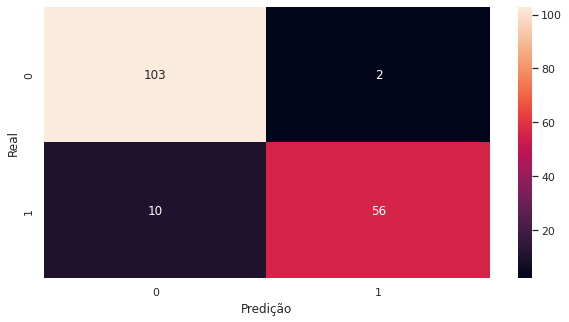

In [74]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
matriz_confusao

plt.figure(figsize=(10,5))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='Predição', ylabel='Real')

In [75]:
selecionador_rfecv.n_features_

26

In [76]:
selecionador_rfecv.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

In [77]:
#Obtendo quais features foram selecionadas
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

O seletor escolheu 19 features para utilizarmos no modelo

In [78]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

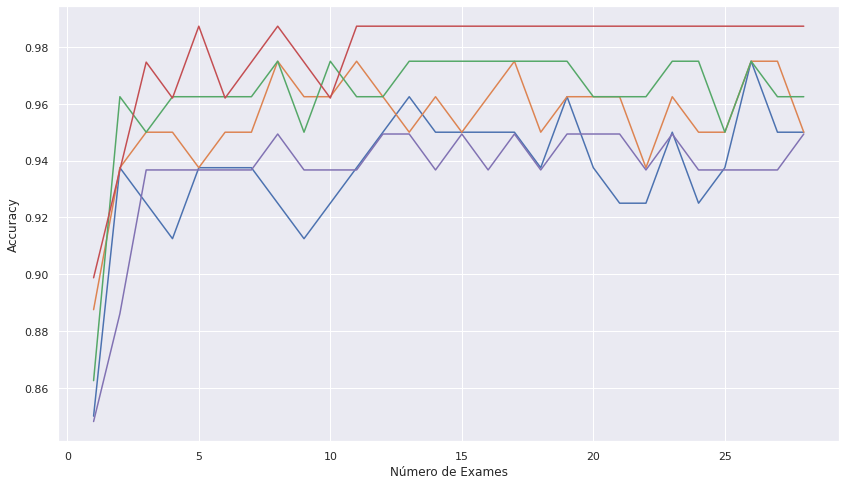

In [80]:
plt.figure(figsize=(14,8))
plt.xlabel('Número de Exames')
plt.ylabel('Accuracy')



plt.plot(range(1, len(selecionador_rfecv.grid_scores_)+1), selecionador_rfecv.grid_scores_)
plt.show

### Observando o modelo no plano

Resultado da classificacao com 5 melhores features selecionadas via RFECV 92.98%


[Text(66.5, 0.5, 'Real'), Text(0.5, 21.5, 'Predição')]

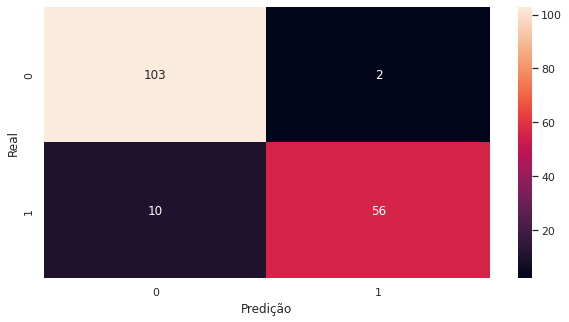

In [88]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)

selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print('Resultado da classificacao com 5 melhores features selecionadas via RFECV %.2f%%' %(classificador.score(teste_rfecv, teste_y) * 100))

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
matriz_confusao

plt.figure(figsize=(10,5))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='Predição', ylabel='Real')

In [91]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [92]:
valores_exames_v7.shape

(569, 2)

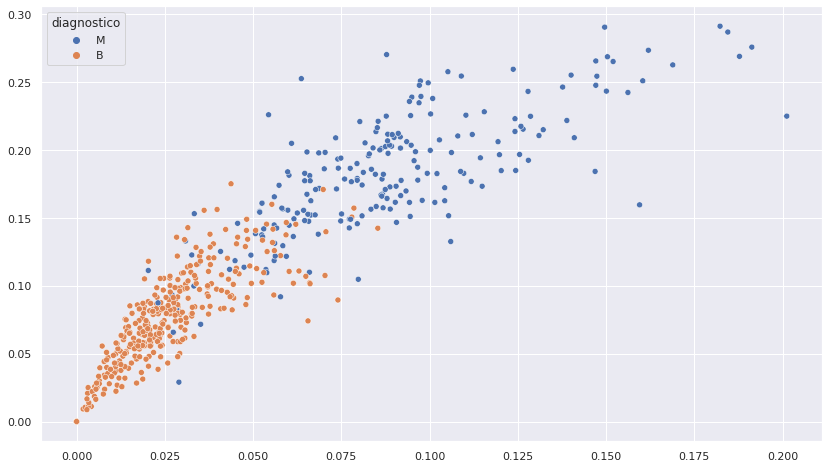

In [94]:
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)

Selecionando apenas duas features perdemos muita informação do modelo

### PCA

*   Transforma os dados matematicamente, possibilitando uma visualização no plano cartesiano
*   O PCA se comporta melhor quando os dados estão normalizados

In [101]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)

valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [102]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

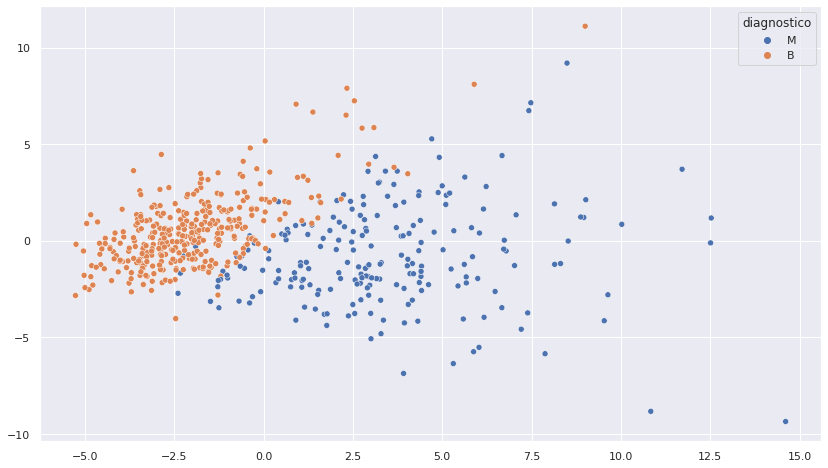

In [103]:
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

### t-SNE

*   Mantém as distâncias multivariadas entre os pontos em uma proporcionalidade para duas dimensões.

In [110]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components = 2)

valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
valores_exames_v9

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 15.209032  , -28.01386   ],
       [  0.38132188, -21.891842  ],
       [ 10.516318  , -25.98165   ],
       ...,
       [ -3.103668  , -16.166954  ],
       [ 15.337509  , -25.717407  ],
       [-16.548843  ,  23.2121    ]], dtype=float32)

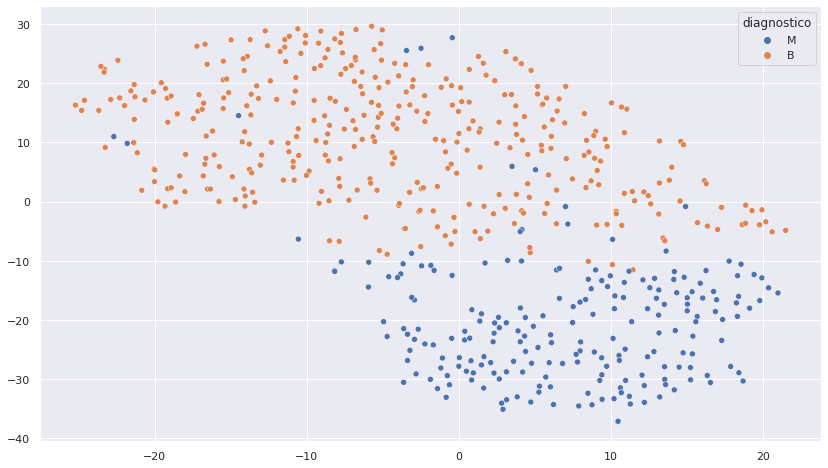

In [111]:
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)